# _import modules & set constants_

In [1]:
# enable in-line MatPlotLib
%matplotlib inline

In [4]:
# import Python modules
from __future__ import division, print_function
from matplotlib import pyplot
import multiprocessing
import numpy
import os
import pandas
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [5]:
# set CONSTANTS

# using AWS EMR?
AWS_EMR_MODE = os.path.expanduser('~') == '/home/hadoop'

# data paths
DATA_FILE_NAME = 'UsedCars.csv'
DATA_URL = 'https://raw.githubusercontent.com/ChicagoBoothML/DATA___UsedCars/master/%s' % DATA_FILE_NAME

# number of examples to display from a data set
NB_EXAMPLES_TO_SHOW = 9

# random seed
RANDOM_SEED = 99

In [20]:
def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()


def rmse(y_hat, y):
    return numpy.sqrt(((y_hat - y) ** 2).mean())

# import Used Cars data set

In [7]:
# read Used Cars data into data frame
used_cars_df = \
    pandas.read_csv(
        DATA_URL,
        dtype=dict(
            price=float,
            trim=pandas.Categorical,
            isOneOwner=pandas.Categorical,
            mileage=float,
            year=float,
            color=pandas.Categorical,
            displacement=float,
            fuel=pandas.Categorical,
            region=pandas.Categorical,
            soundSystem=pandas.Categorical,
            wheelType=pandas.Categorical))

used_cars_df[:NB_EXAMPLES_TO_SHOW]

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988.0,320,f,193296.0,1995.0,Black,3.2,Gasoline,SoA,unsp,Alloy
1,6595.0,320,f,129948.0,1995.0,other,3.2,Gasoline,Mid,Premium,Alloy
2,7993.0,320,f,140428.0,1997.0,White,3.2,Gasoline,Mid,Bose,Alloy
3,5995.0,420,f,113622.0,1999.0,Silver,4.2,Gasoline,Mid,unsp,Alloy
4,3000.0,420,f,167673.0,1999.0,Silver,4.2,Gasoline,SoA,unsp,Alloy
5,7400.0,430,f,82419.0,2002.0,White,4.3,Gasoline,Mid,Bose,Alloy
6,10850.0,430,f,101264.0,2000.0,White,4.3,Gasoline,SoA,unsp,unsp
7,8990.0,430,f,110651.0,2001.0,Black,4.3,Gasoline,SoA,unsp,Alloy
8,7950.0,430,f,108173.0,2000.0,Silver,4.3,Gasoline,ESC,Bose,unsp


Let's now split the data set into a Training set for fitting models and a Test set for evaluating them:

_(**note**: here we shall skip splitting a Validation set because we can use Out-of-Bag and Cross Validation RMSE estimates)_

In [8]:
used_cars_train_df, used_cars_test_df = \
    train_test_split(
        used_cars_df,
        train_size=.8,
        random_state=RANDOM_SEED)

In [9]:
used_cars_train_df[:NB_EXAMPLES_TO_SHOW]

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
17246,15000.0,430,f,83072.0,2005.0,Silver,4.3,Gasoline,SoA,unsp,Alloy
12228,33900.0,550,t,33976.0,2007.0,Silver,5.5,Gasoline,SoA,Harman Kardon,Alloy
6267,51995.0,550,t,16399.0,2013.0,unsp,4.6,Gasoline,Mid,Harman Kardon,Alloy
14924,58995.0,550,f,17000.0,2012.0,Black,4.6,Gasoline,New,Premium,Alloy
9499,30980.0,550,f,57514.0,2008.0,White,5.5,Gasoline,Pac,Harman Kardon,unsp
15656,17750.0,430,f,44087.0,2006.0,Blue,4.3,Gasoline,ENC,unsp,Alloy
14082,30850.0,550,f,71020.0,2007.0,unsp,5.5,Gasoline,Mid,unsp,unsp
1317,32995.0,550,f,82364.0,2008.0,other,5.5,Gasoline,WSC,unsp,Alloy
11422,10990.0,500,f,91577.0,2002.0,Silver,5.0,Gasoline,SoA,Bose,unsp


In [10]:
used_cars_test_df[:NB_EXAMPLES_TO_SHOW]

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
1203,56444.0,550,f,26334.0,2013.0,White,4.6,Gasoline,WSC,unsp,unsp
11046,68290.0,550,f,15367.0,2012.0,Black,4.6,Gasoline,SoA,Harman Kardon,Alloy
3054,10995.0,430,f,116733.0,2004.0,Silver,4.3,Gasoline,WSC,unsp,unsp
19279,60992.0,550,t,25809.0,2012.0,Black,4.6,Gasoline,SoA,unsp,unsp
3035,35862.0,400,f,75989.0,2010.0,White,3.5,Hybrid,SoA,Harman Kardon,Alloy
4894,49492.0,550,f,17232.0,2010.0,Gray,5.5,Gasoline,WSC,Premium,Alloy
10913,10995.0,55 AMG,f,136105.0,2002.0,Silver,5.4,Gasoline,Pac,Bose,Alloy
8583,53995.0,550,f,24482.0,2013.0,White,4.6,Gasoline,Mid,unsp,unsp
13134,15495.0,430,f,78491.0,2005.0,White,4.3,Gasoline,SoA,unsp,unsp


To sanity-check, let's plot the distributions of the _price_ variable in the 3 data sets:

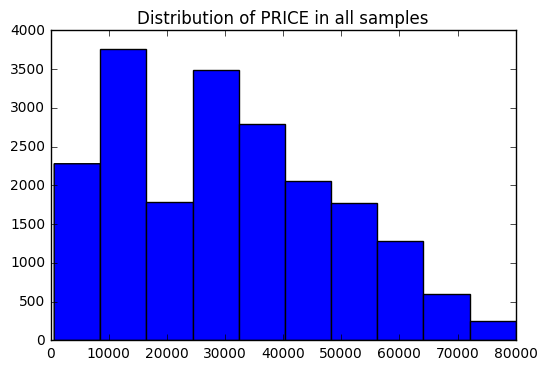

In [11]:
pyplot.hist(list(used_cars_df.price))
pyplot.title('Distribution of PRICE in all samples')

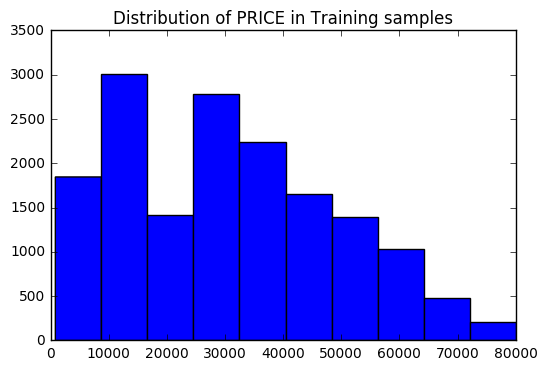

In [12]:
pyplot.hist(list(used_cars_train_df.price))
pyplot.title('Distribution of PRICE in Training samples')

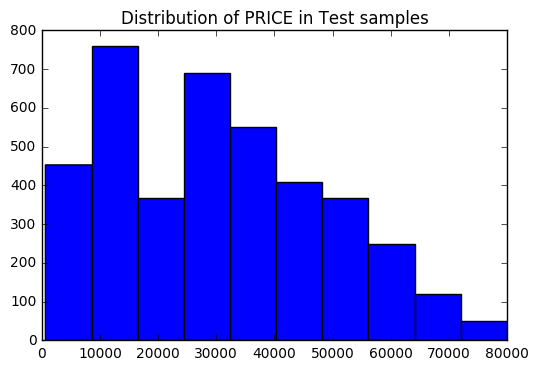

In [13]:
pyplot.hist(list(used_cars_test_df.price))
pyplot.title('Distribution of PRICE in Test samples')

# Random Forest models

In [14]:
B = 300

rf_model = \
    RandomForestRegressor(
        n_estimators=B,
        criterion='mse',
        max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
        min_samples_split=60,
        min_samples_leaf=30,
        min_weight_fraction_leaf=0.0,
        max_features='auto',   # number of features to consider when looking for the best split; "auto": max_features=n_features
        max_leaf_nodes=None,   # None: unlimited number of leaf nodes
        bootstrap=True,
        oob_score=True,   # estimate Out-of-Bag RMSE
        n_jobs=multiprocessing.cpu_count() - 2,   # paralellize over all CPU cores but 2
        random_state=RANDOM_SEED,
        verbose=0,
        warm_start=False)

## Random Forest with 2 Predictors

In [15]:
rf_model.fit(
    X=used_cars_train_df[['mileage', 'year']],
    y=used_cars_train_df.price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=30,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=2, oob_score=True, random_state=99,
           verbose=0, warm_start=False)

The estimated OOB RMSE of this Random Forest Model is:

In [16]:
# note that the "oob_score_" provided by SciKit is the estimated Out-of-Bag R^2
# from R^2 we can derive a rough RMSE
numpy.sqrt(used_cars_train_df['price'].var() * (1 - rf_model.oob_score_))

5395.4169888935658

The Test-set OOS RMSE is:

In [21]:
rmse(y_hat=rf_model.predict(used_cars_test_df[['mileage', 'year']]),
     y=used_cars_test_df.price)

5234.5403545179061

## Random Forest with Many Predictors

In [22]:
predictor_names = \
    ['trim', 'isOneOwner', 'mileage', 'year', 'color',
     'displacement', 'fuel', 'region', 'soundSystem', 'wheelType']

In [23]:
rf_model.fit(
    X=pandas.get_dummies(
        used_cars_train_df[predictor_names]),
    y=used_cars_train_df.price)
    # (GET_DUMMIES expands the categorical variables)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=30,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=2, oob_score=True, random_state=99,
           verbose=0, warm_start=False)

The estimated OOB RMSE of this Random Forest Model is:

In [24]:
# note that the "oob_score_" provided by SciKit is the estimated Out-of-Bag R^2
# from R^2 we can derive a rough RMSE
numpy.sqrt(used_cars_train_df['price'].var() * (1 - rf_model.oob_score_))

4498.1062890751618

The Test-set OOS RMSE is:

In [25]:
rmse(y_hat=rf_model.predict(pandas.get_dummies(used_cars_test_df[predictor_names])),
     y=used_cars_test_df.price)

4469.8265582407212

# Boosted Trees models

In [26]:
B = 1000

boost_model = \
    GradientBoostingRegressor(
        n_estimators=B,
        loss='ls',   # Least-Squares objective loss function
        learning_rate=.01,   # shrinkage parameter
        subsample=1.0,
        min_samples_split=200,
        min_samples_leaf=100,
        min_weight_fraction_leaf=0.0,
        max_depth=10,   # maximum tree depth / number of levels of interaction
        init=None,
        random_state=RANDOM_SEED,
        max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
        alpha=0.9,   # NOT RELEVANT for Least-Squares loss function
        verbose=0,
        max_leaf_nodes=None,   # None: unlimited number of leaf nodes
        warm_start=False)

## Boosted Trees with 2 Predictors

Based on the Training set, a Boosted Trees ensemble with 2 predictors has the following estimated OOS RSME:

In [27]:
def mse_score(estimator, X, y):
    y_hat = estimator.predict(X)
    return mse(y_hat, y)

numpy.sqrt(
    cross_val_score(
        boost_model,
        X=used_cars_train_df[['mileage', 'year']],
        y=used_cars_train_df.price,
        cv=KFold(n=len(used_cars_train_df),
                 n_folds=5,   # 5-fold cross validation
                 shuffle=True),
        scoring=mse_score).mean())

5386.9179285934979

And the Test-set OOS RMSE is:

In [28]:
boost_model.fit(
    X=used_cars_train_df[['mileage', 'year']],
    y=used_cars_train_df.price)

rmse(y_hat=boost_model.predict(used_cars_test_df[['mileage', 'year']]),
     y=used_cars_test_df.price)

5229.3123880159692

## Boosted Trees with Many Predictors

Based on the Training set, a Boosted Trees ensemble with many predictors has the following estimated OOS RSME:

In [ ]:
numpy.sqrt(
    cross_val_score(
        boost_model,
        X=pandas.get_dummies(used_cars_train_df[predictor_names]),
        y=used_cars_train_df.price,
        cv=KFold(n=len(used_cars_train_df),
                 n_folds=5,   # 5-fold cross validation
                 shuffle=True),
        scoring=mse_score).mean())

And the Test-set OOS RMSE is:

In [38]:
boost_model.fit(
    X=pandas.get_dummies(used_cars_train_df[predictor_names]),
    y=used_cars_train_df.price)

rmse(y_hat=boost_model.predict(pandas.get_dummies(used_cars_test_df[predictor_names])),
     y=used_cars_test_df.price)

4092.6074245786417

Overall, this exercise shows the power of simple but extremely flexible trees-based methods such as Random Forest and Boosted Trees. When having many variables, all we have to do is to throw them into a trees ensemble!